In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [2]:
mnist = keras.datasets.mnist

In [28]:
(train_features,train_labels),(test_features,test_labels)=mnist.load_data()

In [29]:
train_features.shape

(60000, 28, 28)

In [30]:
test_features.shape

(10000, 28, 28)

7


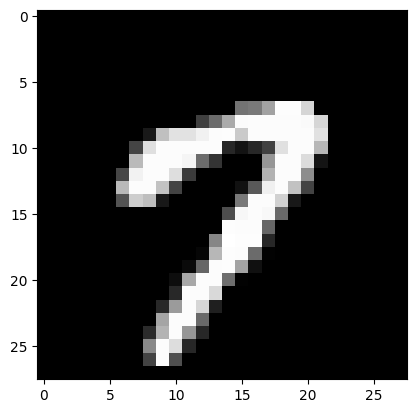

In [31]:
idx=15
img=train_features[idx]
print(train_labels[idx])
plt.gray()
plt.imshow(img)

قبل از اینکه شبکه رو ترین کنیم باید preproccessing انجام بدیم

# پیش پردازش
‌# preprocessing

برای اینکه مدل ما نسبت به بزرگی یک عدد اهمیت بیشتری نخوایم بده به یک داده باید داده ها را نرمالایز کنیم

تو پیکسل تصویر ما مقدار منفی نداریم
کمترین عددی که داریم صفر و بیشترین 255 است

In [32]:
np.min(img),np.max(img)

(np.uint8(0), np.uint8(255))

In [8]:
train_features=train_features/255.0
test_features=test_features/255.0

model definition

نمایش یکی از داده ها

In [27]:
img=test_features[1000]
img.shape

(28, 28)

بالایی نشون میده که یک ماتریس داریم که 28 تا ستون داره و 28 تا سطر

لایه فلتن داده ورودی میگیره و خروجی میده بصورت سطر و فلت شده است

softmax 
اون مقداری که از همه بیشتره میکنه 1 بقیه رو صفر میکنه

برای مثال 
[0.25,0.88,0.5] => [0,1,0]

In [34]:
model=keras.Sequential()
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=128, activation='relu'))
model.add(keras.layers.Dense(units=128, activation='relu'))
model.add(keras.layers.Dense(units=10, activation='softmax'))


accuracy
دقت الگوریتم رو نشون میده

In [36]:
model.compile(optimizer=tf.optimizers.Adam(),loss=tf.losses.sparse_categorical_crossentropy,metrics=['accuracy'])

میخوایم یک لیستی بسازیم که 1 سطر داشته باشه با 28 در 28 تا ستون
یا برعکس با 28در28 سطر و 1 ستون

In [37]:
model.build(input_shape=(None,28,28))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

In [38]:
hist = model.fit(train_features,train_labels,epochs=100,batch_size=256,validation_data=(test_features,test_labels))

Epoch 1/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7394 - loss: 11.1394 - val_accuracy: 0.8955 - val_loss: 1.0345
Epoch 2/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9196 - loss: 0.7114 - val_accuracy: 0.9217 - val_loss: 0.6742
Epoch 3/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9422 - loss: 0.3957 - val_accuracy: 0.9300 - val_loss: 0.5457
Epoch 4/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9542 - loss: 0.2562 - val_accuracy: 0.9365 - val_loss: 0.4721
Epoch 5/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9625 - loss: 0.1847 - val_accuracy: 0.9429 - val_loss: 0.4506
Epoch 6/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9720 - loss: 0.1264 - val_accuracy: 0.9459 - val_loss: 0.3790
Epoch 7/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9760 - loss: 0.0953 - val_accuracy: 0.9438 - val_loss: 0.4154
Epoch 8/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9765 - loss: 0.0923 - val_acc

مشخص کردن validation_data بصورت جداگانه
و دیدن دقت الگوریتم روی داده تست

عدد اول تابع هزینه است و عدد دوم accuracy

In [39]:
model.evaluate(test_features,test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9649 - loss: 0.7560


[0.6112248301506042, 0.9714000225067139]

prediction

تست پیش بینی مدل

In [45]:
idx=662
img = test_features[idx]
print(test_labels[idx])

9


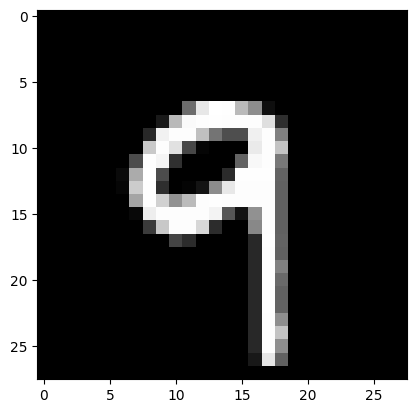

In [46]:
plt.gray()
plt.imshow(img)

In [47]:
test_data=np.reshape(img,(-1,784))
test_data.shape

(1, 784)

In [51]:
test_data_reshaped = img.reshape(1, 28, 28)
test_data_reshaped.shape

(1, 28, 28)

In [52]:
model.predict(test_data_reshaped)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


array([[0.00000e+00, 0.00000e+00, 0.00000e+00, 2.96171e-36, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]],
      dtype=float32)

نمایش نموداری

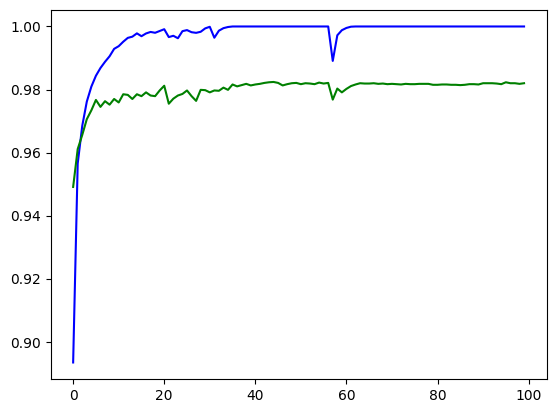

In [20]:
acc = hist.history["accuracy"]
val_acc = hist.history["val_accuracy"]

plt.plot(acc,color="blue")
plt.plot(val_acc,color="green")
